# Машинное обучение в бизнесе

### Урок 7. Интерпретация прогнозов модели (SHAP): объясняем поведение модели на отдельных наблюдениях

__Домашнее задание__<br>
Практическое задание:<br>
1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. сделать обзорный анализ выбранного датасета
3. сделать feature engineering
4. обучить любой классификатор (какой вам нравится)
5. разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%
8. для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

__Ссылки:__<br>
- Пример с Permutation Importance - https://www.kaggle.com/dansbecker/permutation-importance
- Github проекта SHAP - https://github.com/slundberg/shap
- https://arxiv.org/pdf/1809.04559.pdf
- https://medium.com/civis-analytics/demystifying-black-box-models-with-shap-value-analysis-3e20b536fc80
- https://en.wikipedia.org/wiki/Shapley_value

__Feature selection:__<br>

RFE - recursive feature elimination (есть в sklearn)<br>
Boruta - shadow features<br>
Target permutation<br>

Выполнил ___Соковнин ИЛ___

# <center> Практическое задание </center>

# 1. Задание

- взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- сделать обзорный анализ выбранного датасета

## AI4I 2020 Predictive Maintenance Dataset
- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

__Abstract__: The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry (синтетический набор данных, отражающий реальные данные прогнозного обслуживания, встречающиеся в промышленности.).

### Data Set Description

__Data Set Characteristics__: Multivariate, Time-Series<br>
__Number of Instances__: 10000<br>
__Area__: Computer<br>
__Attribute Characteristics__: 	Real<br>
__Number of Attributes__: 14<br>
__Date Donated__: 2020-08-30<br>
__Associated Tasks__: Classification, Regression, Causal-Discovery<br>
__Missing Values?__ N/A<br>
__Number of Web Hits__: 31808



__Source__:

Stephan Matzka, School of Engineering - Technology and Life, Hochschule fÃ¼r Technik und Wirtschaft Berlin, 12459 Berlin, Germany, stephan.matzka '@' htw-berlin.de

__Data Set Information__:

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

__Attribute Information__:

The dataset consists of 10 000 data points stored as rows with 14 features in columns<br>
- __UID__: unique identifier ranging from 1 to 10000<br>
- __product ID__: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number<br>
    - L - Low
    - M - medium
    - Р - high 
- __air temperature [K]__: generated using a random walk process later normalized to a standard deviation of 2 K around 300K<br>
- __process temperature [K]__: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- __rotational speed [rpm]__: calculated from a power of 2860 W, overlaid with a normally distributed noise
- __torque [Nm]__: (крутящий момент) torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
- __tool wear [min]__: (износ инструмента) The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.<br>

- __The machine failure__: (Отказ машины) consists of five independent failure modes<br>
   - __tool wear failure (TWF)__: (отказ из-за износа инструмента (TWF)) the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
   - __heat dissipation failure (HDF)__: (отказ отвода тепла (HDF)) heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
   - __power failure (PWF)__: (сбой питания) the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
   - __overstrain failure (OSF)__: (отказ перенапряжения) if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
   - __random failures (RNF)__: each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.<br>

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

Если хотя бы один из вышеперечисленных режимов сбоя истинен, процесс завершается ошибкой, а метка «сбой машины» устанавливается на 1. 

__Relevant Papers__:

Stephan Matzka, 'Explainable Artificial Intelligence for Predictive Maintenance Applications', Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)


__Citation Request__:

Please refer to the Machine Learning Repository's citation policy

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline

# 2. Визуализация
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Загрузка данных

In [3]:
data = pd.read_csv("./data/ai4i2020.csv")
data.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [4]:
columns_name = [#'UDI',
                #'Product ID',
                'Type',
                'Air temperature [K]',
                'Process temperature [K]',
                'Rotational speed [rpm]',
                'Torque [Nm]',
                'Tool wear [min]',
                'Machine failure'
                #, 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'
               ]
df = data[columns_name]

## Анализ данных

In [5]:
df.shape

(10000, 7)

In [6]:
print('Строк в df:',df.shape[0])  # gives number of row count
print('Столбцов в df:',df.shape[1])  # gives number of col count

Строк в df: 10000
Столбцов в df: 7


In [7]:
df.iloc[0]  # Получаем первую строку (index=0)

Type                           M
Air temperature [K]        298.1
Process temperature [K]    308.6
Rotational speed [rpm]      1551
Torque [Nm]                 42.8
Tool wear [min]                0
Machine failure                0
Name: 0, dtype: object

In [8]:
# Рассмотрим типы признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [10]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [11]:
# columns_name = ['UDI', 'Product ID', 'Type', 'Air temperature [K]',
#        'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
#        'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
#        'RNF']

In [12]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
#categorical_columns.remove('Product ID')
#numerical_columns.remove('UDI')
numerical_columns.remove('Machine failure')
print(categorical_columns)
print(numerical_columns)

['Type']
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [13]:
df.describe(include=[object])

,Type
count,10000
unique,3
top,L
freq,6000


In [14]:
df[categorical_columns].describe()

,Type
count,10000
unique,3
top,L
freq,6000


Определить полный перечень значений категориальных признаков:

In [15]:
# for c in categorical_columns[1]:
print(df['Type'].unique())

['M' 'L' 'H']


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

In [16]:
from pandas.plotting import scatter_matrix
from matplotlib.artist import setp

In [17]:
# axs = scatter_matrix(df[numerical_columns], alpha=0.05, figsize=(20, 20));
# # Поворот названия полей
# n = len(df[numerical_columns].columns)
# for x in range(n):
#     for y in range(n):
#         # to get the axis of subplots
#         ax = axs[x, y]
#         # to make x axis name vertical  
#         ax.xaxis.label.set_rotation(90)
#         # to make y axis name horizontal 
#         ax.yaxis.label.set_rotation(0)
#         # to make sure y axis names are outside the plot area
#         ax.yaxis.labelpad = 50
        
# # https://overcoder.net/q/1009773/создание-надписей-на-графике-рассеяния-по-вертикали-и-горизонтали-в-пандах

In [18]:
numerical_columns.append('Machine failure')
numerical_columns

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

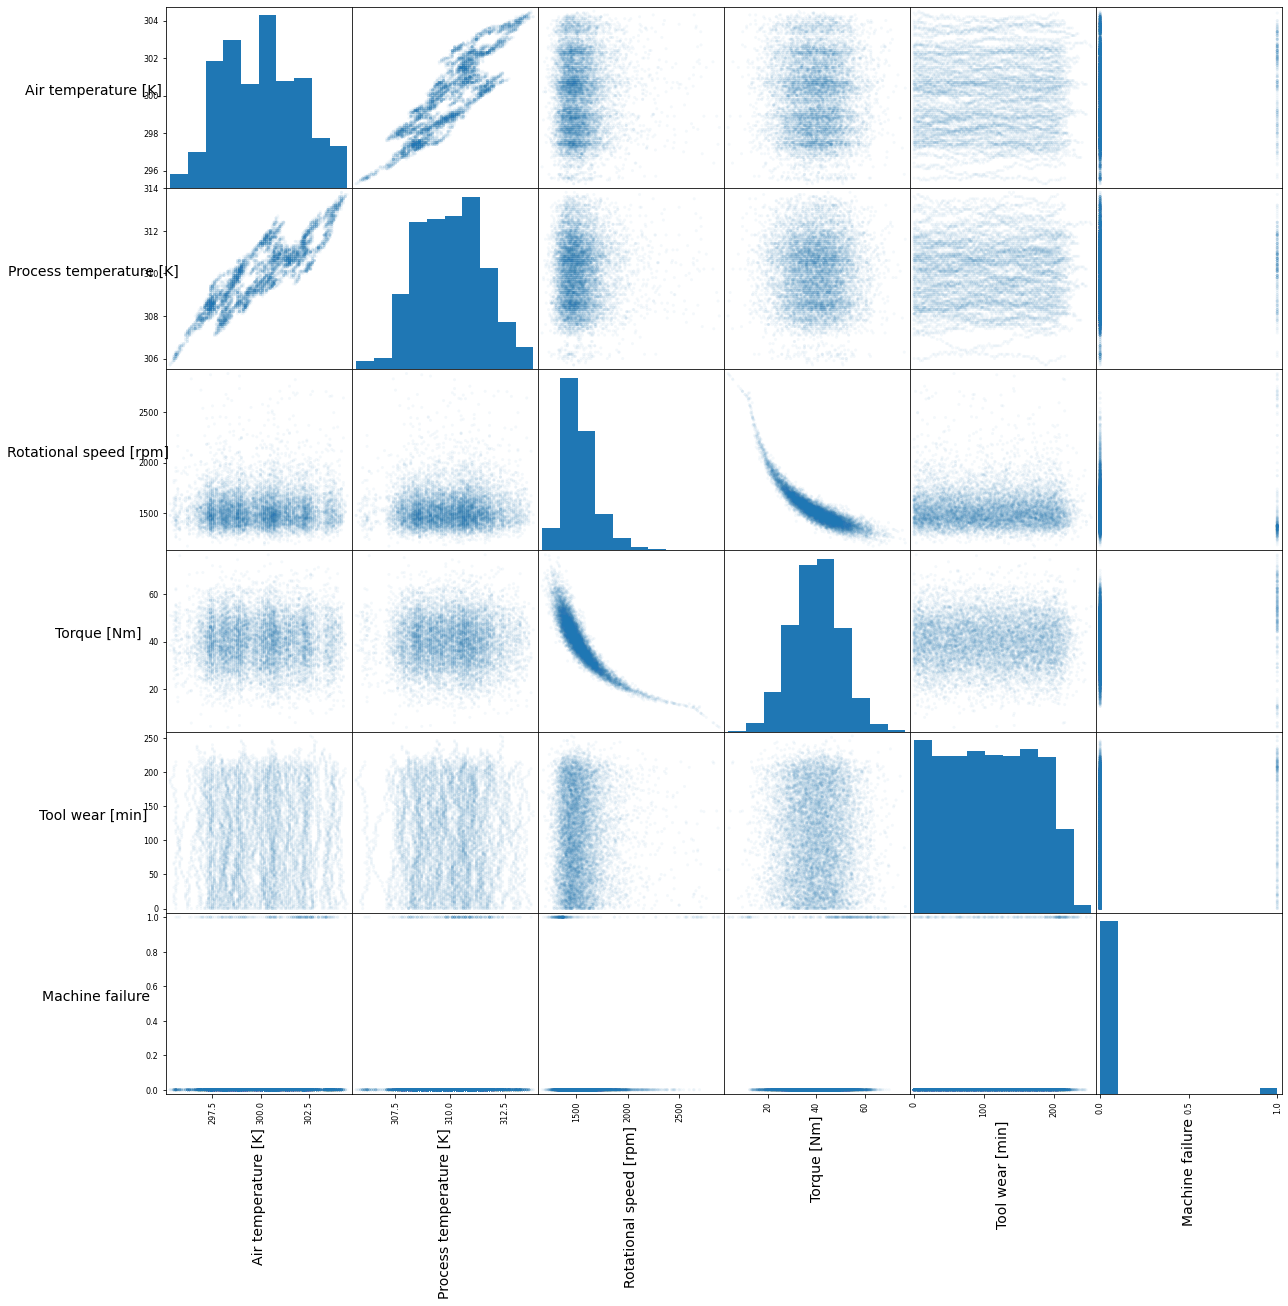

In [19]:
axs = scatter_matrix(data[numerical_columns], alpha=0.05, figsize=(20, 20));
# Поворот названия полей
n = len(data[numerical_columns].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

__Посмотрим на корреляционную матрицу.__

In [20]:
# df[numerical_columns].corr()

In [21]:
data[numerical_columns].corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


Высокая корреляция наблюдается между признаками:
- прямая ___Air temperature [K]___ и ___Process temperature [K]___ (0.876107)
- обратная ___Rotational speed [rpm]___ и ___Torque [Nm]___: (-0.875027)

<!-- Средняя корреляция наблюдается между признаками:
- ___Machine failure___ и ___TWF___ (0.362904),
- ___Machine failure___ и ___HDF___ (0.575800),
- ___Machine failure___ и ___PWF___ (0.522812),
- ___Machine failure___ и ___OSF___ (0.531083)

Поле __Machine failure__ равно 1, если хотя бы одно из полей __TWF, HDF, PWF, OSF, RNF__ принимает значение 1.
 -->
Остальными признаками не сильно коррелируют между собой. Оставшиеся недиагональные значения по модулю не превосходят 0.2

__Нарисуем диаграмму рассеяния для пар признаков__ сильно коррелирующих между собой, изображая точки, соответствующие объектам из разных классов

In [22]:
#data[numerical_columns].corr()

In [23]:
# data.loc[data['Machine failure'] == 0]

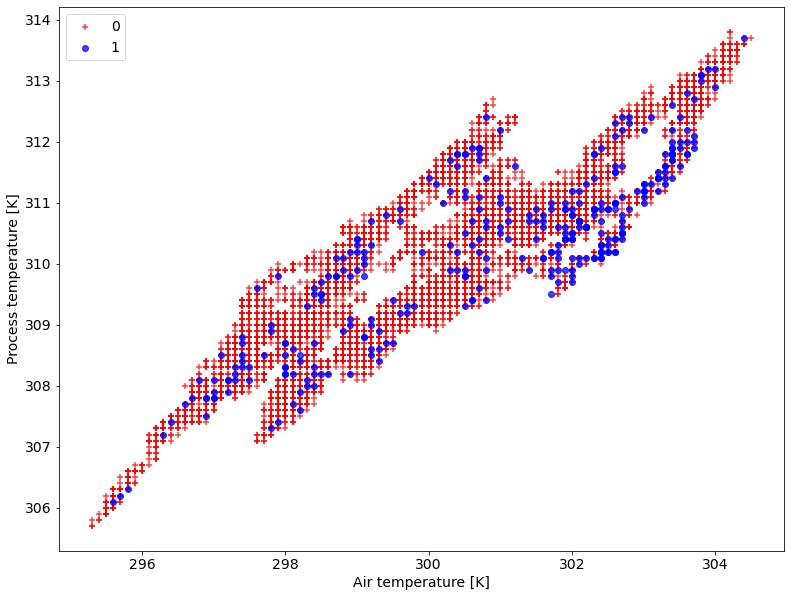

In [24]:
col1 = 'Air temperature [K]'
col2 = 'Process temperature [K]'

plt.figure(figsize=(13, 10))

plt.scatter(data[col1][data['Machine failure'] == 0],
            data[col2][data['Machine failure'] == 0],
            marker='+',
            alpha=0.75,
            color='red',
            label='0')

plt.scatter(data[col1][data['Machine failure'] == 1],
            data[col2][data['Machine failure'] == 1],
            marker='o',
            alpha=0.75,
            color='blue',
            label='1')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

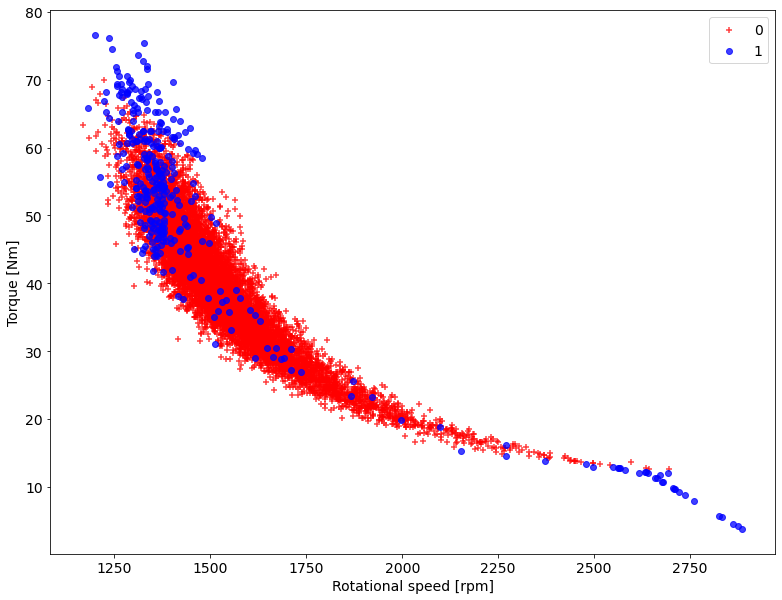

In [25]:
col1 = 'Rotational speed [rpm]'
col2 = 'Torque [Nm]'

plt.figure(figsize=(13, 10))

plt.scatter(data[col1][data['Machine failure'] == 0],
            data[col2][data['Machine failure'] == 0],
            marker='+',
            alpha=0.75,
            color='red',
            label='0')

plt.scatter(data[col1][data['Machine failure'] == 1],
            data[col2][data['Machine failure'] == 1],
            marker='o',
            alpha=0.75,
            color='blue',
            label='1')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

In [26]:
# col1 = 'Air temperature [K]'
# col2 = 'Process temperature [K]'

# plt.figure(figsize=(15, 10))
# #['M' 'L' 'H']
# plt.scatter(df[col1][df['Type'] == 'M'],
#             df[col2][df['Type'] == 'M'],
#             marker='+',
#             alpha=1,
#             color='red',
#             label='M')

# plt.scatter(df[col1][df['Type'] == 'L'],
#             df[col2][df['Type'] == 'L'],
#             marker='o',
#             alpha=0.2,
#             color='blue',
#             label='L')

# plt.scatter(df[col1][df['Type'] == 'H'],
#             df[col2][df['Type'] == 'H'],
#             marker='d',
#             alpha=0.4,
#             color='green',
#             label='H')


# plt.xlabel(col1)
# plt.ylabel(col2)
# plt.legend(loc='best');

In [27]:
# col1 = 'Rotational speed [rpm]'
# col2 = 'Torque [Nm]'

# plt.figure(figsize=(15, 15))
# #['M' 'L' 'H']
# plt.scatter(df[col1][df['Type'] == 'M'],
#             df[col2][df['Type'] == 'M'],
#             marker='+',
#             alpha=1,
#             color='red',
#             label='M')

# plt.scatter(df[col1][df['Type'] == 'L'],
#             df[col2][df['Type'] == 'L'],
#             marker='o',
#             alpha=0.1,
#             color='blue',
#             label='L')

# plt.scatter(df[col1][df['Type'] == 'H'],
#             df[col2][df['Type'] == 'H'],
#             marker='d',
#             alpha=0.2,
#             color='green',
#             label='H')


# plt.xlabel(col1)
# plt.ylabel(col2)
# plt.legend(loc='best');

Поле __Machine failure__ равно 1 если хотя бы одно из полей __TWF, HDF, PWF, OSF, RNF__ принимает значение 1.

# EDA и очистка данных

Делаем EDA для:

* Исправления выбросов
* Заполнения NaN
* Идей для генерации новых фич

### 1. Обработка пропусков<a class="anchor" id="gaps"></a>

In [28]:
# df.isnull()
# df.notnull()

### representing null/NaN values using seaborn plotting techniques

<AxesSubplot:>

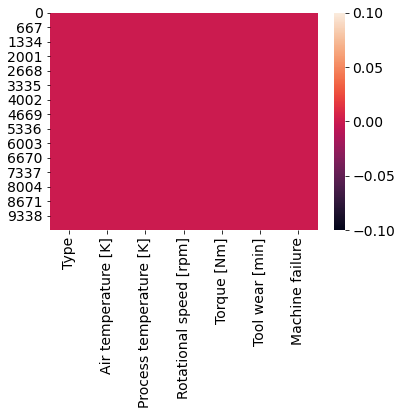

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.isna().sum()  # просматриваем пропуски

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

Видим, что __пропусков нет__.

### 2. Обзор целевой переменной

In [31]:
target = 'Machine failure'
df[target].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [32]:
df.iloc[:, -1].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [33]:
# Переименовать поля:
# Type -> target
# df = df.rename(columns={'Type': 'target'})

In [34]:
# Checking unique object data
object_cols = [col for col in df.columns if (col == "Machine failure")] # (col == "treatment") | (col == "target")]
for obj in object_cols:
    print(f'\n{obj}')
    for unique in df[obj].unique():
        print(f'- {unique} {sum(df[obj] == unique)}')


Machine failure
- 0 9661
- 1 339


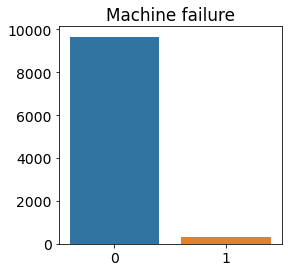

In [35]:
counts = df[target].value_counts()  # Количество различных значений признака 'Y'
# print(counts)

plt.figure(figsize=(4,4))    
plt.title('Machine failure')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [36]:
# df.loc[(df['Machine failure'] == 1) | (df['OSF'] == 1)].head(10)

### 3. Обзор категориальных признаков¶

In [37]:
print(categorical_columns)

['Type']


In [38]:
df['Type'].describe()

count     10000
unique        3
top           L
freq       6000
Name: Type, dtype: object

In [39]:
# Checking unique object data
object_cols = [col for col in df.columns if (col == "Type")] # (col == "treatment") | (col == "target")]
for obj in object_cols:
    print(f'\n{obj}')
    for unique in df[obj].unique():
        print(f'- {unique} {sum(df[obj] == unique)}')


Type
- M 2997
- L 6000
- H 1003


<AxesSubplot:title={'center':'Type'}>

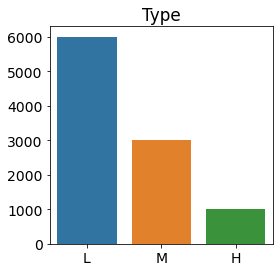

In [40]:
counts = df['Type'].value_counts()  # Количество различных значений признака 'Type'
# print(counts)

plt.figure(figsize=(4,4))    
plt.title('Type')
sns.barplot(counts.index, counts.values)
    
# Переименовать поля:
# conversion -> target
# df_model = df_model.rename(columns={'conversion': 'target'})plt.show()

__Data Preprocessing__

In [41]:
# Приводим поле Type к числовому виду (0, 1, 2)
# Заменим L на 0, M на 1, H на 2
# df.Type = df.Type.map({'L': 0, 'M': 1, 'H': 2})

# print(df.columns)
# df.head(3)

In [42]:
# # Checking unique object data
# object_cols = [col for col in df.columns if (col == "Type")] # (col == "treatment") | (col == "target")]
# for obj in object_cols:
#     print(f'\n{obj}')
#     for unique in df[obj].unique():
#         print(f'- {unique} {sum(df[obj] == unique)}')

In [43]:
# counts = df['Type'].value_counts()  # Количество различных значений признака 'Type'
# # print(counts)

# plt.figure(figsize=(4,4))    
# plt.title('Type')
# sns.barplot(counts.index, counts.values)

### 4. Обзор числовых  признаков

array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>],
       [<AxesSubplot:title={'center':'Tool wear [min]'}>,
        <AxesSubplot:title={'center':'Machine failure'}>]], dtype=object)

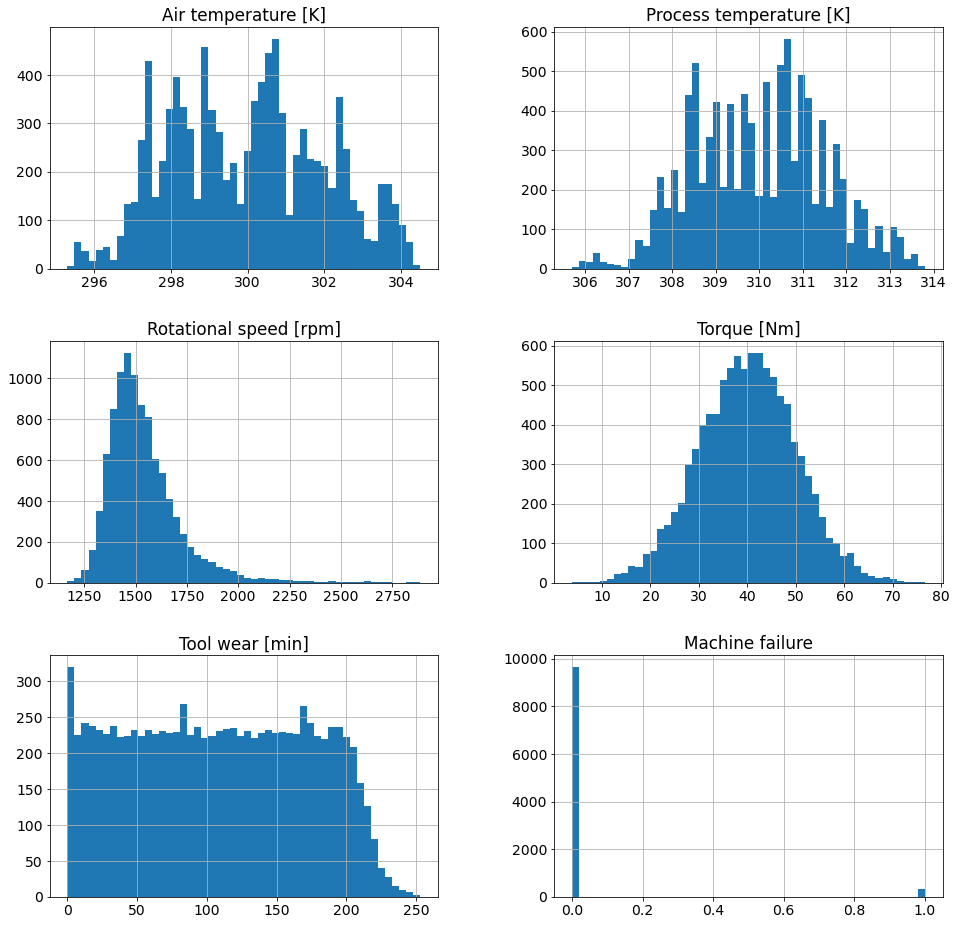

In [44]:
# df_num_features = df.select_dtypes(include=['float32', 'float64', 'int8', 'int16', 'int32', 'int64'])
df_num_features = df[numerical_columns]
df_num_features.hist(figsize=(16, 16), bins=50, grid=True)

In [45]:
numerical_columns

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

In [46]:
# data_numerical['Air temperature [K]'].max()

In [47]:
# # for cat_colname in df.select_dtypes(include='int64').columns:
# for cat_colname in df[numerical_columns]:
#     print(str(cat_colname) + ': (nan='+ str(df[cat_colname].isna().sum()) + ')\n\n' +
#           str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

# 2. Задание

сделать feature engineering

### Обработка категориальных признаков

In [48]:
# One-Hot Encoding:

df = pd.get_dummies(df)

In [49]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0


#### Нормализация количественных признаков

__Отмасштабируем количественных признаки методом нормализации.__

In [50]:
# Находим минимальное и максимальное значение для каждого признака
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])

    return minmax

# Находим минимальное и максимальное значение для каждого признака
def dataset_minmax(dataset, field):
    minmax = list()
    for i in range(df[field].shape[1]):
        value_min = df[field[i]].min()
        value_max = df[field[i]].max()
        minmax.append([value_min, value_max])

    return minmax

# Нормализация датасета (0-1)
def normalize_dataset(dataset, minmax, field):

    for i in range(dataset[field].shape[1]):
        X_min = minmax[i][0]
        X_max = minmax[i][1]

        dataset[field[i]] = pd.Series((dataset[field[i]] - X_min) / ( X_max - X_min))

In [51]:
# # Находим минимальное и максимальное значение для каждого признака
# numerical_columns = ['Air temperature [K]', 'Process temperature [K]',
#                      'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# minmax = dataset_minmax(df, numerical_columns)
# print(minmax)

# # Нормализация датасета (0-1)
# normalize_dataset(df, minmax, numerical_columns)
# df[numerical_columns].head(3)

In [52]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0


### Переименовываем поля

In [53]:
# Air temperature [K] -> Air temperature
df = df.rename(columns={'Air temperature [K]': 'Air temperature'})
# Process temperature [K] -> Process temperature
df = df.rename(columns={'Process temperature [K]': 'Process temperature'})
# Rotational speed [rpm] -> Rotational speed
df = df.rename(columns={'Rotational speed [rpm]': 'Rotational speed'})
# Torque [Nm] -> Torque
df = df.rename(columns={'Torque [Nm]': 'Torque'})
# Tool wear [min] -> Tool wear
df = df.rename(columns={'Tool wear [min]': 'Tool wear'})

# 3. Задание

обучить любой классификатор (какой вам нравится)

__Разбиваем выборку на тренировочную и тестовую части и обучаем модель (градиентный бустинг)__

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
models_results = {
    'model': [],
    'f-score': [],
    'roc': [],
    'recall': [],
    'precision': [],
    'test_size': []
}

In [56]:
df.head(3)

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0


In [57]:
# Разделим данные на train/test
target = 'Machine failure'

x_data = df.drop(target, axis=1)
y_data = df[target]

test_size = 0.1
# test_size = 0.2
# test_size = 0.3
# test_size = 0.4

# X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size, random_state=7)

In [58]:
features = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear',
            'Type_H', 'Type_L','Type_M']
target = 'Machine failure'

#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0)

In [59]:
X_test.head(3)

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_H,Type_L,Type_M
9394,297.7,308.2,1334,53.0,156,0,1,0
898,295.6,306.2,1446,49.9,133,0,1,0
2398,299.2,308.5,1490,43.2,158,0,1,0


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.metrics import mean_absolute_error, r2_score

In [61]:
#соберем простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]
    

    
continuous_columns = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear',
            'Type_H', 'Type_L','Type_M']
final_transformers = list()
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))
    
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [62]:
import xgboost as xgb

In [63]:
regressor = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBRegressor()),
])

In [64]:
#обучим наш пайплайн
regressor.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Air temperature',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Air '
                                                                                     'temperature')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Process temperature',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Process '
                                                                                     'temperature')),
                                                                 ('scaler',
                                           

In [65]:
predictions =  regressor.predict(X_test)
 
mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.031502337974323565, 0.5181408869245381)

In [66]:
xgb_features = pd.DataFrame(regressor[1].feature_importances_, 
                        continuous_columns, 
                        columns=['coefficient'])
xgb_features.head(10)

,coefficient
Air temperature,0.097597
Process temperature,0.157357
Rotational speed,0.087061
Torque,0.248680
Tool wear,0.101863
Type_H,0.103322
Type_L,0.196333
Type_M,0.007788


In [67]:
# model = xgb.XGBClassifier()

# model.fit(X_train, y_train)
# y_predict = model.predict(X_test)

Проверяем качество

In [68]:
# from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

# def evaluate_results(y_test, y_predict):
#     print('Classification results:')
#     f1 = f1_score(y_test, y_predict)
#     print("f1: %.2f%%" % (f1 * 100.0)) 
#     roc = roc_auc_score(y_test, y_predict)
#     print("roc: %.2f%%" % (roc * 100.0)) 
#     rec = recall_score(y_test, y_predict, average='binary')
#     print("recall: %.2f%%" % (rec * 100.0)) 
#     prc = precision_score(y_test, y_predict, average='binary')
#     print("precision: %.2f%%" % (prc * 100.0)) 
    
#     return f1, roc, rec, prc

In [69]:
# from math import nan
# positives_marked = nan

# f1, roc, rec, prc = evaluate_results(y_test, y_predict)

# models_results['model'].append('XGBClassifier')
# models_results['f-score'].append(f1)
# models_results['roc'].append(roc)
# models_results['recall'].append(rec)
# models_results['precision'].append(prc)
# models_results['test_size'].append(test_size)

In [70]:
# import itertools

# X = y_predict
# num = [(x, len(list(y))) for x, y in itertools.groupby(sorted(X))]
# print(num)

In [71]:
# pd.DataFrame(data=models_results).sort_values('f-score', ascending=False)

XGBClassifier

__model |	f-score |	roc |	recall |	precision |	test_size__<br>

0 |	0.812500 |	0.880283 |	0.764706 |	0.866667 |	0.1<br>
3 |	0.768657 |	0.841385 |	0.686667 |	0.872881 |	0.4<br>
2 |	0.743719 |	0.833768 |	0.672727 |	0.831461 |	0.3<br>
1 |	0.723404 |	0.823801 |	0.653846 |	0.809524 |	0.2<br>

# 4. Задание

разобраться с SHAP и построить важности признаков для:
- всего тестового набора данных (summary_plot - дать интерпретацию)
- для топ 10%

In [72]:
import shap

# load JS visualization code to notebook
shap.initjs()  # получить интерактивные графики.

In [73]:
model = xgb.train({"learning_rate": 0.01}, 
                      xgb.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)

# Создаём объясняющий объект
explainer = shap.TreeExplainer(model)

# Считаем значения Шепли либо для всех доступных наблюдений (датасет – X_train), либо для их части
shap_values = explainer.shap_values(X_train)

__4.1__ Построить важности признаков для всего тестового набора данных (__summary_plot__)

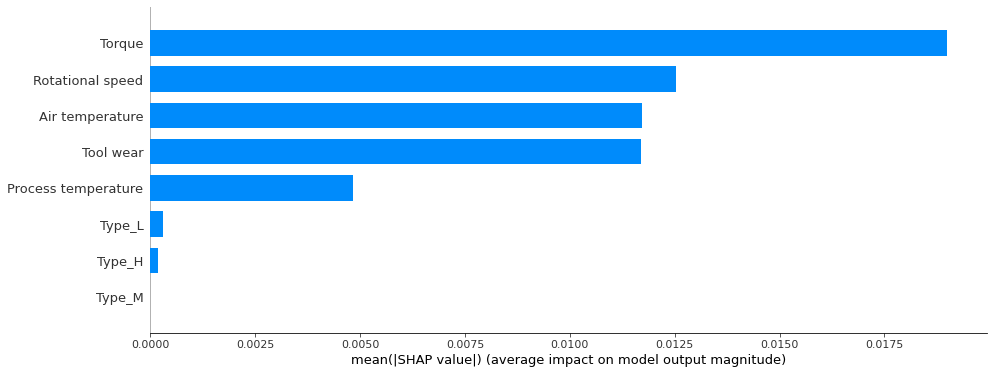

In [96]:
shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(15,6))

__4.2__ Построить важности признаков для топ 10%

График выше показывает вклад каждого признака в предсказание модели относительно базового значения (средний прогноз по всему тренировочному набору данных).

- Цвет точки - это значение признака
- То, насколько точка далека от вертикальной линии (серой) влево - показывает ее вклад как отрицательный
- То, насколько точка далека от вертикальной линии (серой) вправо - показывает ее положительный вклад

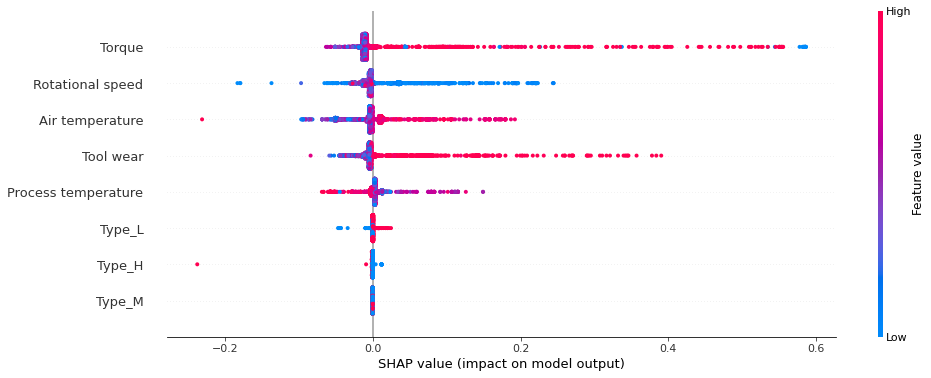

In [94]:
# Посмотреть на всё и сразу можно с помощью shap.summary_plot().
# summarize the effects of all the features
# shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, plot_size=(15,6))

Размер графика устанавливается автоматически, поэтому чтобы его изменить, необходимо указать plot_size=(20,9) (ширину, высоту).


- значения слева от центральной вертикальной линии — это negative класс (0), справа — positive (1)
- чем толще линия на графике, тем больше таких точек наблюдения
- чем краснее точка на графике, тем выше значения признака в ней

- Каждая точка – отдельное наблюдение;
- Цветом обозначены значения соответствующего признака: высокие – красным , низкие – синим;
- Признаки расположены на оси y по мере уменьшения их важности;
- По оси x находятся значения Шепли, которые влияют на отнесение к классу 1 (в случае классификации) либо положительно, либо отрицательно .

# 7. Задание

для отдельных наблюдений вывести __force_plot и попытаться проинтерпретировать результат

#### визуализация

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])<br>

Полученный график показывает, как разные признаки влияют на итоговое предсказание модели.
- Base value (базовое значение) – среднее значение, полученное при обучении;
- Жирным выделено полученное значение;


    shap.force_plot(<br>
        base_value,<br>
        shap_values=None,<br>
        features=None,<br>
        feature_names=None,<br>
        out_names=None,<br>
        link='identity',<br>
        plot_cmap='RdBu',<br>
        matplotlib=False,<br>
        show=True,<br>
        figsize=(20, 3),<br>
        ordering_keys=None,<br>
        ordering_keys_time_format=None,<br>
        text_rotation=0,<br>
        contribution_threshold=0.05,<br>
    )

In [114]:
shap.initjs()  # получить интерактивные графики.
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Полученный график показывает, как разные признаки влияют на итоговое предсказание модели.<br>
- ___Base value___ (базовое значение) – среднее значение, полученное при обучении;
- Жирным выделено полученное значение (0.18);<br>


В случае классификации, часть признаков сдвигают предсказание к классу 0, а какие-то к 1.
- Признаки __Process temperature__ и __Rotational speed__ смещают предсказание в сторону положительного класса (1, вправо)
- Признаки __Air temperature__, __Tool wear__ и __Torque__ смещает предсказание в сторону отрицательного класса (0, влево)

In [115]:
# для 1000 наблюдений
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_train.iloc[:1000,:])

В случае классификации, какие-то переменные сдвигают его к классу 0, а какие-то к 1.
- если значение Шепли положительное (выделено розовым цветом), то оно смещает предсказание в сторону положительного класса (1, вправо),
- если негативное (выделено голубым) - отрицательного (0, влево).

Для регрессии – либо увеличивают, либо уменьшают.


In [78]:
# continuous_columns

'Process temperature' и 'Rotational speed'
'Air temperature', 'Tool wear' и 'Torque'


In [79]:
X_train.iloc[0,:]

Air temperature         300.6
Process temperature     309.4
Rotational speed       1369.0
Torque                   51.6
Tool wear                71.0
Type_H                    0.0
Type_L                    1.0
Type_M                    0.0
Name: 2967, dtype: float64

In [80]:
shap_values[0,:]
shap_values

array([[-5.0707735e-02,  1.2558407e-02,  3.7066884e-02, ...,
         3.8169368e-05,  3.0457915e-04,  0.0000000e+00],
       [-4.2105131e-03,  2.5902542e-03, -2.6794940e-03, ...,
         3.8169368e-05, -1.7596777e-04,  0.0000000e+00],
       [ 1.2916176e-02,  5.1738438e-03, -2.3399392e-02, ...,
         3.8169368e-05,  5.8063990e-05,  0.0000000e+00],
       ...,
       [-3.7181433e-03,  2.7336099e-03, -5.4658493e-03, ...,
        -7.2375999e-04, -1.7796115e-04,  0.0000000e+00],
       [-4.2816224e-03,  2.5950514e-03, -2.5887692e-03, ...,
         3.8169368e-05,  6.1779479e-05,  0.0000000e+00],
       [-5.0615735e-02,  1.2648145e-02,  2.2666262e-02, ...,
         3.5324338e-05,  3.4626215e-04,  0.0000000e+00]], dtype=float32)

In [81]:
explainer.expected_value

0.20424521

In [ ]:
# shap.force_plot?

In [108]:
X_train.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Type_H', 'Type_L', 'Type_M'],
      dtype='object')

__dependence plot__

Еще один вариант графика — dependence plot (_график зависимости_), показывающий как выбранные признаки влияют на shap values:
- если значения положительные - модель будет предсказывать положительный класс.
- если значения отрицательное - модель будет предсказывать отрицательный класс.

- y – значение Шепли
- x – значение признака для каждого наблюдения в датасете
- Цвет — значение по другому признаку

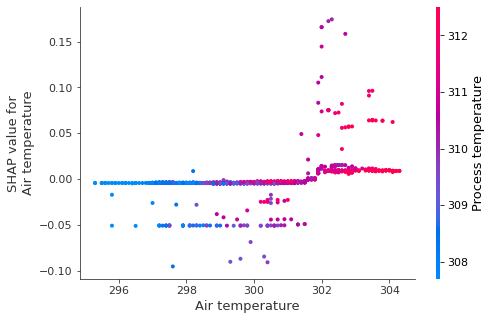

In [110]:
#shap.dependence_plot("RM", shap_values, X, interaction_index='LSTAT')
shap.dependence_plot("Air temperature", shap_values[:1000,:], X_train.iloc[:1000,:],
                     interaction_index='Process temperature')

График показывает как изменяется __Air temperature__  в зависимости от __Process temperature__.

Мы можем заметить, что:
- __Air temperature__ имеет небольшое влияние на __The machine failure (Отказ машины)__ при значениях __Process temperature__ $\approx309.5$.
- Рост __Air temperature__ наблюдаем рост положительного влияния на __The machine failure (Отказ машины)__ при значениях __Process temperature__ $>310$.

- Наблюдается взаимное влияние факторов, понижение __Air temperature__ понижает __Process temperature__, увеличивает отрицательное влияние на __The machine failure (Отказ машины)__.
- И наоборот, повышение __Air temperature__ повышает __Process temperature__, увеличивая положительное влияние на __The machine failure (Отказ машины)__.

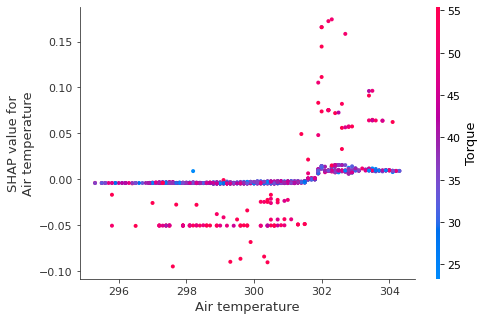

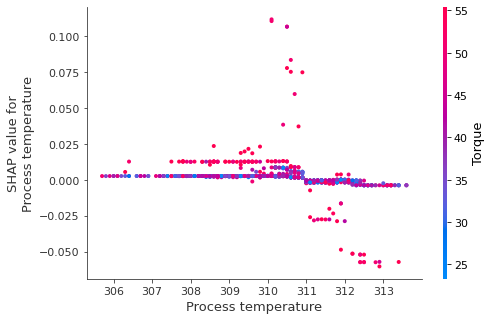

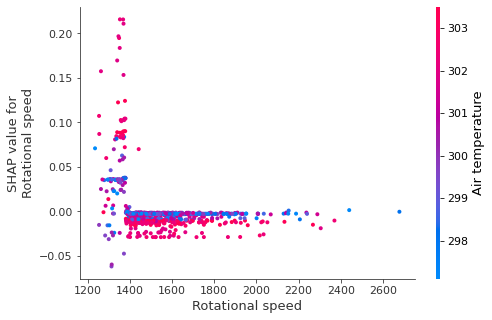

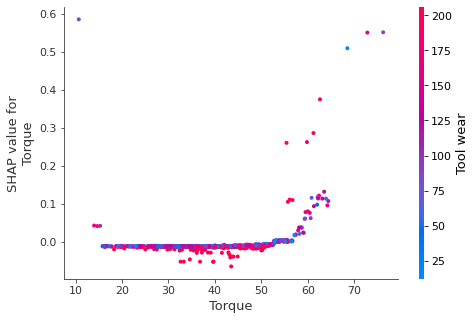

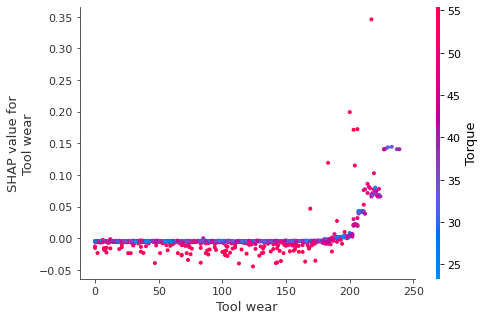

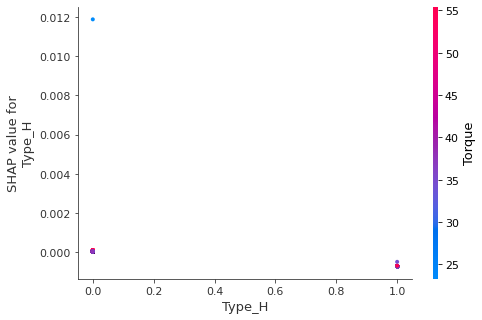

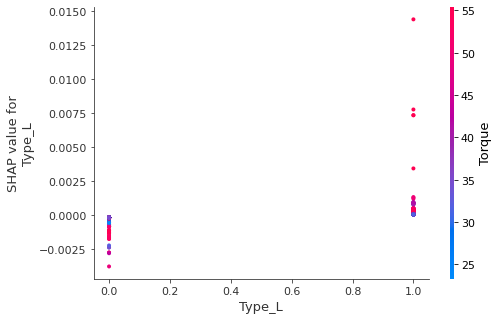

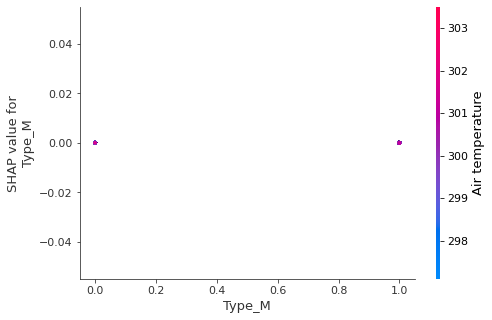

In [107]:
for feature_name in  X_train.columns:
    shap.dependence_plot(feature_name,shap_values[:1000,:],
                         X_train.iloc[:1000,:], display_features=X_train.iloc[:1000,:])

__Ссылки__

https://vk.com/@karpovcourses-interpretaciya-modelei-mashinnogo-obucheniya-v-python-shap<br>
Интерпретация моделей машинного обучения в python: shap<br>

https://github.com/slundberg/shap<br>
Sharp